# Deep Learning

In [1]:
import h2o
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,2 hours 30 mins
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_megan_bvn2lk
H2O cluster total nodes:,1
H2O cluster free memory:,1.390 Gb
H2O cluster total cores:,3
H2O cluster allowed cores:,3
H2O cluster status:,"locked, healthy"


In [3]:
# import the airlines data again
data = h2o.import_file('http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
# split the data
train, valid, test = data.split_frame([0.8,0.1], seed=69)

In [5]:
print('%d/%d/%d' % (train.nrows, valid.nrows, test.nrows))

35255/4272/4451


In [6]:
# set up our x and y
y = 'IsArrDelayed'
ignore_fields = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay',
                 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
                 'IsDepDelayed', 'IsArrDelayed', 'ActualElapsedTime',
                 'ArrTime']
x_all = [i for i in train.names if i not in ignore_fields]

In [7]:
# import the deep learning estimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [8]:
# instantiate the model and time the training
m_def = H2ODeepLearningEstimator()
%time m_def.train(x_all, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 379 ms, sys: 33.7 ms, total: 413 ms
Wall time: 1min 14s


In [9]:
m_def.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.12657396521346517
RMSE: 0.3557723502655387
LogLoss: 0.3835011518468862
Mean Per-Class Error: 0.18094997898276588
AUC: 0.9077538215483038
AUCPR: 0.7826766048973202
Gini: 0.8155076430966075

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5720938876040007: 


,,NO,YES,Error,Rate
0,NO,1507.0,443.0,0.2272,(443.0/1950.0)
1,YES,342.0,2159.0,0.1367,(342.0/2501.0)
2,Total,1849.0,2602.0,0.1764,(785.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.572094,0.846169,187.0
1,max f2,0.261159,0.905491,302.0
2,max f0point5,0.686507,0.857596,141.0
3,max accuracy,0.574863,0.823635,186.0
4,max precision,0.999910,1.000000,0.0
5,max recall,0.009493,1.000000,394.0
6,max specificity,0.999910,1.000000,0.0
7,max absolute_mcc,0.574863,0.640472,186.0
8,max min_per_class_accuracy,0.618404,0.816873,168.0
9,max mean_per_class_accuracy,0.583846,0.819050,182.0



Gains/Lift Table: Avg response rate: 56.19 %, avg score: 60.91 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.013480,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.023990,0.023990,77.968812,77.968812
1,,2,0.020220,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.011995,0.035986,77.968812,77.968812
2,,3,0.030106,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017593,0.053579,77.968812,77.968812
3,,4,0.040216,0.999999,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017993,0.071571,77.968812,77.968812
4,,5,0.050101,0.999981,1.779688,1.779688,1.000000,0.999993,1.000000,0.999999,0.017593,0.089164,77.968812,77.968812
5,,6,0.100202,0.998505,1.779688,1.779688,1.000000,0.999504,1.000000,0.999751,0.089164,0.178329,77.968812,77.968812
6,,7,0.150079,0.991966,1.763655,1.774360,0.990991,0.995666,0.997006,0.998394,0.087965,0.266293,76.365490,77.435972
7,,8,0.200180,0.976626,1.771707,1.773696,0.995516,0.985495,0.996633,0.995165,0.088764,0.355058,77.170746,77.369591
8,,9,0.300157,0.903452,1.647711,1.731732,0.925843,0.946614,0.973054,0.978994,0.164734,0.519792,64.771125,73.173246
9,,10,0.400135,0.773955,1.371760,1.641790,0.770787,0.838106,0.922515,0.943792,0.137145,0.656937,37.175961,64.178977


In [10]:
m_def

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1582418917429_1


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,002 weights/biases, 9.2 MB, 353,332 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3801,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.507693,0.477819,0,0.000138673,0.0265729,-0.367423,0.287854
2,,3,200,Rectifier,0,0,0,0.232618,0.303651,0,-0.00578436,0.0842298,-0.0854263,0.302378
3,,4,2,Softmax,,0,0,0.018458,0.0528913,0,-0.0252199,0.287372,-0.00503739,0.281233




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.10905862656012817
RMSE: 0.3302402558140485
LogLoss: 0.3379995593978509
Mean Per-Class Error: 0.14699925678186543
AUC: 0.9354677017935027
AUCPR: 0.8078652121480032
Gini: 0.8709354035870054

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5710267222104293: 


,,NO,YES,Error,Rate
0,NO,3557.0,889.0,0.2,(889.0/4446.0)
1,YES,600.0,4920.0,0.1087,(600.0/5520.0)
2,Total,4157.0,5809.0,0.1494,(1489.0/9966.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.571027,0.868567,189.0
1,max f2,0.316696,0.917138,279.0
2,max f0point5,0.735122,0.888147,120.0
3,max accuracy,0.596371,0.852298,179.0
4,max precision,0.999913,1.000000,0.0
5,max recall,0.017132,1.000000,390.0
6,max specificity,0.999913,1.000000,0.0
7,max absolute_mcc,0.632041,0.702977,165.0
8,max min_per_class_accuracy,0.620096,0.850906,169.0
9,max mean_per_class_accuracy,0.632041,0.853001,165.0



Gains/Lift Table: Avg response rate: 55.39 %, avg score: 60.85 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011339,1.000000,1.805435,1.805435,1.000000,1.000000,1.000000,1.000000,0.020471,0.020471,80.543478,80.543478
1,,2,0.020068,1.000000,1.805435,1.805435,1.000000,1.000000,1.000000,1.000000,0.015761,0.036232,80.543478,80.543478
2,,3,0.030002,1.000000,1.805435,1.805435,1.000000,1.000000,1.000000,1.000000,0.017935,0.054167,80.543478,80.543478
3,,4,0.040036,0.999997,1.805435,1.805435,1.000000,0.999999,1.000000,1.000000,0.018116,0.072283,80.543478,80.543478
4,,5,0.050070,0.999972,1.805435,1.805435,1.000000,0.999989,1.000000,0.999998,0.018116,0.090399,80.543478,80.543478
5,,6,0.100040,0.998383,1.805435,1.805435,1.000000,0.999462,1.000000,0.999730,0.090217,0.180616,80.543478,80.543478
6,,7,0.150010,0.992350,1.801809,1.804227,0.997992,0.995825,0.999331,0.998429,0.090036,0.270652,80.180941,80.422713
7,,8,0.200080,0.980299,1.769254,1.795475,0.979960,0.986811,0.994483,0.995522,0.088587,0.359239,76.925372,79.547501
8,,9,0.300020,0.914890,1.732927,1.774640,0.959839,0.953595,0.982943,0.981555,0.173188,0.532428,73.292736,77.463974
9,,10,0.400060,0.789898,1.548292,1.718039,0.857573,0.856376,0.951593,0.950253,0.154891,0.687319,54.829161,71.803852




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.1272668746845084
RMSE: 0.35674483133537954
LogLoss: 0.3887565088603829
Mean Per-Class Error: 0.1764856997576132
AUC: 0.9078003674617426
AUCPR: 0.7762746994135064
Gini: 0.8156007349234853

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5381617595411958: 


,,NO,YES,Error,Rate
0,NO,1450.0,483.0,0.2499,(483.0/1933.0)
1,YES,301.0,2038.0,0.1287,(301.0/2339.0)
2,Total,1751.0,2521.0,0.1835,(784.0/4272.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.538162,0.838683,200.0
1,max f2,0.238736,0.898413,307.0
2,max f0point5,0.742117,0.864178,118.0
3,max accuracy,0.618306,0.821161,167.0
4,max precision,0.999932,1.000000,0.0
5,max recall,0.039289,1.000000,378.0
6,max specificity,0.999932,1.000000,0.0
7,max absolute_mcc,0.644006,0.644102,157.0
8,max min_per_class_accuracy,0.606846,0.819452,172.0
9,max mean_per_class_accuracy,0.644006,0.823514,157.0



Gains/Lift Table: Avg response rate: 54.75 %, avg score: 59.96 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.012640,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.023087,0.023087,82.642155,82.642155
1,,2,0.020131,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.013681,0.036768,82.642155,82.642155
2,,3,0.030197,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.018384,0.055152,82.642155,82.642155
3,,4,0.040028,0.999999,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.017956,0.073108,82.642155,82.642155
4,,5,0.050094,0.999990,1.826422,1.826422,1.000000,0.999995,1.000000,0.999999,0.018384,0.091492,82.642155,82.642155
5,,6,0.100187,0.998777,1.826422,1.826422,1.000000,0.999621,1.000000,0.999810,0.091492,0.182984,82.642155,82.642155
6,,7,0.150047,0.992660,1.809272,1.820723,0.990610,0.996202,0.996880,0.998611,0.090209,0.273194,80.927205,82.072288
7,,8,0.200140,0.979952,1.766679,1.807196,0.967290,0.986995,0.989474,0.995704,0.088499,0.361693,76.667879,80.719606
8,,9,0.300094,0.906855,1.659606,1.758038,0.908665,0.948753,0.962559,0.980066,0.165883,0.527576,65.960553,75.803759
9,,10,0.400047,0.769747,1.475680,1.687490,0.807963,0.840660,0.923932,0.945235,0.147499,0.675075,47.568017,68.748954




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-02-22 21:24:11,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-02-22 21:24:13,6.620 sec,2249 obs/sec,0.139271,1,4910.0,0.613235,1.164372,-0.521905,...,0.721652,1.805435,0.401465,0.617890,1.182522,-0.541070,0.664086,0.713262,1.826422,0.441713
2,,2020-02-22 21:24:54,46.778 sec,5573 obs/sec,6.133768,44,216246.0,0.364587,0.404893,0.462058,...,0.843503,1.805435,0.191652,0.379222,0.432692,0.419521,0.882102,0.814022,1.826422,0.213951
3,,2020-02-22 21:25:21,1 min 13.687 sec,5680 obs/sec,10.022181,72,353332.0,0.330240,0.338000,0.558640,...,0.807865,1.805435,0.149408,0.356745,0.388757,0.486293,0.907800,0.776275,1.826422,0.183521



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DepTime,1.000000,1.000000,0.002144
1,CRSDepTime,0.776047,0.776047,0.001664
2,TailNum.NA,0.759562,0.759562,0.001629
3,CRSElapsedTime,0.653247,0.653247,0.001401
4,AirTime,0.582877,0.582877,0.001250
5,Cancelled,0.494724,0.494724,0.001061
6,TaxiOut,0.454728,0.454728,0.000975
7,Year,0.431339,0.431339,0.000925
8,CRSArrTime,0.422447,0.422447,0.000906
9,Diverted,0.379996,0.379996,0.000815



See the whole table with table.as_data_frame()


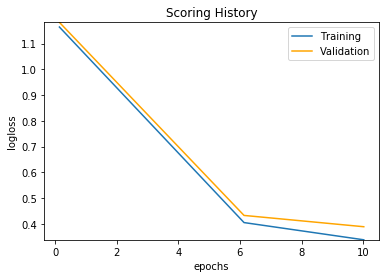

In [11]:
# plot the scoring history
m_def.plot()

In [12]:
# increase number of epochs but keep early stopping to avoid overfitting
# note these early stopping parameters are the defaults
m_200_epochs = H2ODeepLearningEstimator(
                epochs=200,
                stopping_rounds=5,
                stopping_tolerance=0,
                stopping_metric='logloss')
%time m_200_epochs.train(x_all, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 897 ms, sys: 95.2 ms, total: 992 ms
Wall time: 6min 13s


In [13]:
m_200_epochs.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.12755496684461543
RMSE: 0.3571483821111548
LogLoss: 0.3865137808545524
Mean Per-Class Error: 0.18486267031648884
AUC: 0.9029435405325049
AUCPR: 0.7367977192890534
Gini: 0.8058870810650098

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35578051966605573: 


,,NO,YES,Error,Rate
0,NO,1354.0,596.0,0.3056,(596.0/1950.0)
1,YES,260.0,2241.0,0.104,(260.0/2501.0)
2,Total,1614.0,2837.0,0.1923,(856.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.355781,0.839640,247.0
1,max f2,0.158083,0.908345,317.0
2,max f0point5,0.551874,0.852318,170.0
3,max accuracy,0.469812,0.815322,202.0
4,max precision,0.999947,1.000000,0.0
5,max recall,0.008323,1.000000,391.0
6,max specificity,0.999947,1.000000,0.0
7,max absolute_mcc,0.469812,0.625846,202.0
8,max min_per_class_accuracy,0.489229,0.810876,195.0
9,max mean_per_class_accuracy,0.544279,0.815137,173.0



Gains/Lift Table: Avg response rate: 56.19 %, avg score: 53.36 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.025163,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.044782,0.044782,77.968812,77.968812
1,,2,0.030106,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.008796,0.053579,77.968812,77.968812
2,,3,0.040216,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017993,0.071571,77.968812,77.968812
3,,4,0.050101,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017593,0.089164,77.968812,77.968812
4,,5,0.100202,0.999755,1.779688,1.779688,1.000000,0.999943,1.000000,0.999972,0.089164,0.178329,77.968812,77.968812
5,,6,0.150079,0.995192,1.779688,1.779688,1.000000,0.998270,1.000000,0.999406,0.088764,0.267093,77.968812,77.968812
6,,7,0.200180,0.969966,1.747765,1.771699,0.982063,0.985193,0.995511,0.995849,0.087565,0.354658,74.776547,77.169850
7,,8,0.300157,0.834690,1.579723,1.707755,0.887640,0.906625,0.959581,0.966130,0.157937,0.512595,57.972317,70.775462
8,,9,0.400135,0.680522,1.403754,1.631797,0.788764,0.761478,0.916901,0.914995,0.140344,0.652939,40.375400,63.179714
9,,10,0.500112,0.541037,1.227785,1.551031,0.689888,0.608281,0.871518,0.853680,0.122751,0.775690,22.778484,55.103098


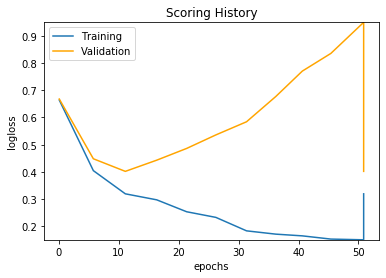

In [14]:
# note that when it stops, it compares back to the best, hence the drop at the end of the graph
m_200_epochs.plot()

In [15]:
m_200_epochs

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1582418917429_9


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,002 weights/biases, 9.2 MB, 1,793,090 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3801,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.519413,0.47784,0,0.000199022,0.0267338,-0.379567,0.247802
2,,3,200,Rectifier,0,0,0,0.29181,0.338065,0,-0.00383418,0.0915075,-0.154914,0.292956
3,,4,2,Softmax,,0,0,0.0169061,0.026749,0,-0.00419751,0.311575,0.0079065,0.457214




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.10371003105081184
RMSE: 0.3220404183496411
LogLoss: 0.31946854306524125
Mean Per-Class Error: 0.1542933001916147
AUC: 0.9356697634143302
AUCPR: 0.764777236130516
Gini: 0.8713395268286603

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4165751463543816: 


,,NO,YES,Error,Rate
0,NO,3574.0,919.0,0.2045,(919.0/4493.0)
1,YES,595.0,4943.0,0.1074,(595.0/5538.0)
2,Total,4169.0,5862.0,0.1509,(1514.0/10031.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.416575,0.867193,226.0
1,max f2,0.210168,0.918926,304.0
2,max f0point5,0.688135,0.885039,124.0
3,max accuracy,0.435154,0.849666,219.0
4,max precision,0.999957,1.000000,0.0
5,max recall,0.019158,1.000000,385.0
6,max specificity,0.999957,1.000000,0.0
7,max absolute_mcc,0.435154,0.695313,219.0
8,max min_per_class_accuracy,0.493846,0.844647,198.0
9,max mean_per_class_accuracy,0.435154,0.845707,219.0



Gains/Lift Table: Avg response rate: 55.21 %, avg score: 53.21 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.023128,1.000000,1.811304,1.811304,1.000000,1.000000,1.000000,1.000000,0.041892,0.041892,81.130372,81.130372
1,,2,0.030007,1.000000,1.811304,1.811304,1.000000,1.000000,1.000000,1.000000,0.012459,0.054352,81.130372,81.130372
2,,3,0.040076,1.000000,1.811304,1.811304,1.000000,1.000000,1.000000,1.000000,0.018238,0.072589,81.130372,81.130372
3,,4,0.050045,0.999999,1.811304,1.811304,1.000000,1.000000,1.000000,1.000000,0.018057,0.090646,81.130372,81.130372
4,,5,0.100090,0.999702,1.811304,1.811304,1.000000,0.999930,1.000000,0.999965,0.090646,0.181293,81.130372,81.130372
5,,6,0.150035,0.996396,1.811304,1.811304,1.000000,0.998554,1.000000,0.999495,0.090466,0.271759,81.130372,81.130372
6,,7,0.200080,0.974865,1.804087,1.809499,0.996016,0.988201,0.999003,0.996670,0.090285,0.362044,80.408737,80.949873
7,,8,0.300070,0.855936,1.740874,1.786631,0.961117,0.921323,0.986379,0.971563,0.174070,0.536114,74.087416,78.663148
8,,9,0.400060,0.695023,1.536809,1.724191,0.848455,0.776444,0.951906,0.922795,0.153666,0.689780,53.680904,72.419143
9,,10,0.500050,0.542971,1.170214,1.613418,0.646062,0.616016,0.890750,0.861452,0.117010,0.806789,17.021417,61.341807




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.13244269080426563
RMSE: 0.3639267657156665
LogLoss: 0.40199321823194056
Mean Per-Class Error: 0.1928491821023527
AUC: 0.8960980579202338
AUCPR: 0.7249693066409701
Gini: 0.7921961158404676

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39123027325459686: 


,,NO,YES,Error,Rate
0,NO,1409.0,524.0,0.2711,(524.0/1933.0)
1,YES,326.0,2013.0,0.1394,(326.0/2339.0)
2,Total,1735.0,2537.0,0.199,(850.0/4272.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.391230,0.825677,235.0
1,max f2,0.100833,0.894089,344.0
2,max f0point5,0.652910,0.848133,129.0
3,max accuracy,0.480067,0.804073,195.0
4,max precision,0.999953,1.000000,0.0
5,max recall,0.014162,1.000000,387.0
6,max specificity,0.999953,1.000000,0.0
7,max absolute_mcc,0.579415,0.613753,157.0
8,max min_per_class_accuracy,0.476558,0.803762,197.0
9,max mean_per_class_accuracy,0.579415,0.807151,157.0



Gains/Lift Table: Avg response rate: 54.75 %, avg score: 52.43 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.024813,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.045319,0.045319,82.642155,82.642155
1,,2,0.030197,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.009833,0.055152,82.642155,82.642155
2,,3,0.040028,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.017956,0.073108,82.642155,82.642155
3,,4,0.050094,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.018384,0.091492,82.642155,82.642155
4,,5,0.100187,0.999808,1.826422,1.826422,1.000000,0.999962,1.000000,0.999981,0.091492,0.182984,82.642155,82.642155
5,,6,0.150047,0.996264,1.800697,1.817874,0.985915,0.998552,0.995320,0.999506,0.089782,0.272766,80.069730,81.787355
6,,7,0.200140,0.973779,1.800818,1.813605,0.985981,0.987317,0.992982,0.996455,0.090209,0.362976,80.081751,81.360455
7,,8,0.300094,0.832523,1.621110,1.749490,0.887588,0.910228,0.957878,0.967735,0.162035,0.525011,62.110952,74.948959
8,,9,0.400047,0.662646,1.398688,1.661841,0.765808,0.748888,0.909889,0.913055,0.139803,0.664814,39.868816,66.184055
9,,10,0.500000,0.511047,1.103552,1.550235,0.604215,0.588895,0.848783,0.848254,0.110304,0.775118,10.355213,55.023514




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-02-22 21:28:57,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-02-22 21:28:58,6.252 sec,2316 obs/sec,0.119699,1,4220.0,0.489392,0.663902,0.031471,...,0.727623,1.811304,0.395275,0.490511,0.667722,0.028822,0.689825,0.711021,1.826422,0.396770
2,,2020-02-22 21:29:40,47.539 sec,5185 obs/sec,5.796852,50,204368.0,0.365061,0.404653,0.461073,...,0.803298,1.811304,0.198285,0.386295,0.448271,0.397665,0.870881,0.788331,1.826422,0.216292
3,,2020-02-22 21:30:17,1 min 24.496 sec,5392 obs/sec,11.128492,96,392335.0,0.322040,0.319469,0.580608,...,0.764777,1.811304,0.150932,0.363927,0.401993,0.465401,0.896098,0.724969,1.826422,0.198970
4,,2020-02-22 21:30:54,2 min 0.629 sec,5466 obs/sec,16.357566,141,576686.0,0.312308,0.297423,0.605575,...,0.672179,1.811304,0.140066,0.372816,0.443065,0.438965,0.895222,0.634284,1.826422,0.198736
5,,2020-02-22 21:31:28,2 min 34.894 sec,5525 obs/sec,21.354304,184,752846.0,0.286443,0.253580,0.668200,...,0.592738,1.811304,0.112551,0.371619,0.486269,0.442562,0.899690,0.537208,1.826422,0.185861
6,,2020-02-22 21:32:03,3 min 10.414 sec,5496 obs/sec,26.221869,226,924452.0,0.276581,0.232910,0.690655,...,0.604479,1.811304,0.104476,0.377820,0.535898,0.423803,0.896851,0.544906,1.826422,0.191948
7,,2020-02-22 21:32:39,3 min 46.527 sec,5503 obs/sec,31.335640,270,1104738.0,0.243415,0.183457,0.760397,...,0.537087,1.811304,0.085834,0.376554,0.584205,0.427659,0.893944,0.483950,1.826422,0.187734
8,,2020-02-22 21:33:15,4 min 22.430 sec,5471 obs/sec,36.214182,312,1276731.0,0.236337,0.171333,0.774129,...,0.536911,1.811304,0.082245,0.381087,0.677054,0.413797,0.891428,0.480494,1.826422,0.199438
9,,2020-02-22 21:33:49,4 min 55.920 sec,5439 obs/sec,40.630662,350,1432434.0,0.231759,0.165050,0.782793,...,0.415485,1.811304,0.078457,0.382284,0.770255,0.410106,0.889288,0.415292,1.822536,0.186096



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DepTime,1.000000,1.000000,0.002178
1,CRSDepTime,0.826267,0.826267,0.001799
2,CRSElapsedTime,0.622280,0.622280,0.001355
3,AirTime,0.610933,0.610933,0.001330
4,TailNum.NA,0.597883,0.597883,0.001302
5,Cancelled,0.590235,0.590235,0.001285
6,TaxiOut,0.506142,0.506142,0.001102
7,Year,0.485432,0.485432,0.001057
8,CRSArrTime,0.476709,0.476709,0.001038
9,UniqueCarrier.PS,0.421439,0.421439,0.000918



See the whole table with table.as_data_frame()


In [16]:
# add more layers but keep default early stopping
m_200x200x200 = H2ODeepLearningEstimator(
                epochs=200,
                hidden=[200,200,200])
%time m_200x200x200.train(x_all, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 780 ms, sys: 54.9 ms, total: 835 ms
Wall time: 6min 22s


In [17]:
m_200x200x200.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.14450464668211316
RMSE: 0.3801376680652855
LogLoss: 0.4323085064462269
Mean Per-Class Error: 0.21365433313853943
AUC: 0.8791615661427737
AUCPR: 0.7614442900020102
Gini: 0.7583231322855475

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3462454696550918: 


,,NO,YES,Error,Rate
0,NO,1191.0,759.0,0.3892,(759.0/1950.0)
1,YES,216.0,2285.0,0.0864,(216.0/2501.0)
2,Total,1407.0,3044.0,0.2191,(975.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.346245,0.824166,258.0
1,max f2,0.147727,0.898806,332.0
2,max f0point5,0.515010,0.825090,184.0
3,max accuracy,0.369253,0.791732,243.0
4,max precision,0.999907,1.000000,0.0
5,max recall,0.006308,1.000000,396.0
6,max specificity,0.999907,1.000000,0.0
7,max absolute_mcc,0.377193,0.575140,239.0
8,max min_per_class_accuracy,0.422005,0.785641,221.0
9,max mean_per_class_accuracy,0.424779,0.786346,220.0



Gains/Lift Table: Avg response rate: 56.19 %, avg score: 52.93 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010110,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017993,0.017993,77.968812,77.968812
1,,2,0.020220,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017993,0.035986,77.968812,77.968812
2,,3,0.030106,0.999999,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017593,0.053579,77.968812,77.968812
3,,4,0.040216,0.999995,1.779688,1.779688,1.000000,0.999998,1.000000,0.999999,0.017993,0.071571,77.968812,77.968812
4,,5,0.050101,0.999969,1.779688,1.779688,1.000000,0.999986,1.000000,0.999997,0.017593,0.089164,77.968812,77.968812
5,,6,0.100202,0.998590,1.771707,1.775698,0.995516,0.999516,0.997758,0.999756,0.088764,0.177929,77.170746,77.569779
6,,7,0.150079,0.990957,1.779688,1.777024,1.000000,0.995453,0.998503,0.998326,0.088764,0.266693,77.968812,77.702392
7,,8,0.200180,0.968189,1.675939,1.751724,0.941704,0.981450,0.984287,0.994102,0.083966,0.350660,67.593949,75.172445
8,,9,0.300157,0.804510,1.519734,1.674452,0.853933,0.904742,0.940868,0.964338,0.151939,0.502599,51.973368,67.445208
9,,10,0.400135,0.622487,1.311770,1.583832,0.737079,0.706987,0.889949,0.900036,0.131148,0.633747,31.177012,58.383250


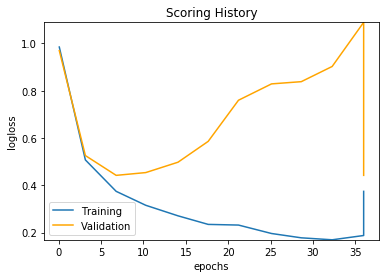

In [18]:
m_200x200x200.plot()

In [19]:
# add different layers
m_400x400 = H2ODeepLearningEstimator(
                epochs=200,
                hidden=[400,400])
%time m_400x400.train(x_all, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 1.71 s, sys: 97 ms, total: 1.81 s
Wall time: 14min


In [20]:
m_400x400.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.12048694276622411
RMSE: 0.3471122912923484
LogLoss: 0.3861499208279489
Mean Per-Class Error: 0.17472723731020412
AUC: 0.9148047447687592
AUCPR: 0.6161827505167599
Gini: 0.8296094895375183

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34530734145415043: 


,,NO,YES,Error,Rate
0,NO,1389.0,561.0,0.2877,(561.0/1950.0)
1,YES,229.0,2272.0,0.0916,(229.0/2501.0)
2,Total,1618.0,2833.0,0.1775,(790.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.345307,0.851894,254.0
1,max f2,0.064916,0.909597,355.0
2,max f0point5,0.745357,0.867769,105.0
3,max accuracy,0.418990,0.826556,226.0
4,max precision,0.999971,0.997506,0.0
5,max recall,0.000278,1.000000,399.0
6,max specificity,0.999971,0.998974,0.0
7,max absolute_mcc,0.512401,0.646759,187.0
8,max min_per_class_accuracy,0.501654,0.823271,192.0
9,max mean_per_class_accuracy,0.512401,0.825273,187.0



Gains/Lift Table: Avg response rate: 56.19 %, avg score: 54.42 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.035722,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.063575,0.063575,77.968812,77.968812
1,,2,0.040440,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.008397,0.071971,77.968812,77.968812
2,,3,0.050101,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017193,0.089164,77.968812,77.968812
3,,4,0.100202,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.089164,0.178329,77.968812,77.968812
4,,5,0.150079,0.999957,1.779688,1.779688,1.000000,0.999991,1.000000,0.999997,0.088764,0.267093,77.968812,77.968812
5,,6,0.200180,0.998692,1.731804,1.767704,0.973094,0.999603,0.993266,0.999898,0.086765,0.353858,73.180414,76.770369
6,,7,0.300157,0.944469,1.671707,1.735729,0.939326,0.981813,0.975299,0.993875,0.167133,0.520992,67.170705,73.572876
7,,8,0.400135,0.762436,1.455745,1.665772,0.817978,0.860029,0.935991,0.960432,0.145542,0.666533,45.574489,66.577210
8,,9,0.500112,0.565688,1.163796,1.565422,0.653933,0.668621,0.879605,0.902096,0.116353,0.782887,16.379605,56.542199
9,,10,0.600090,0.410173,0.963831,1.465194,0.541573,0.484515,0.823287,0.832525,0.096361,0.879248,-3.616890,46.519438


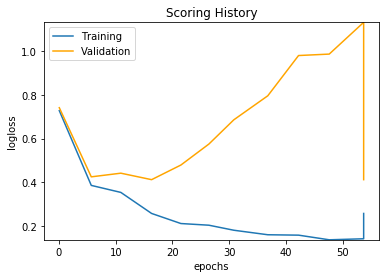

In [21]:
m_400x400.plot()

Note that all of the above start to overfit around 10+ epochs.  Our early stopping stops the training before we get to 200 epochs.  Note that added more hidden units in each layer really slows down our training times.  Look at the number of parameters we are training in these models.

In [22]:
# about 800,000 parameters in our base model
m_def.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,002 weights/biases, 9.2 MB, 353,332 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3801,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.507693,0.477819,0,0.000138673,0.0265729,-0.367423,0.287854
2,,3,200,Rectifier,0,0,0,0.232618,0.303651,0,-0.00578436,0.0842298,-0.0854263,0.302378
3,,4,2,Softmax,,0,0,0.018458,0.0528913,0,-0.0252199,0.287372,-0.00503739,0.281233


In [23]:
m_def.summary()['units']

[3801, 200, 200, 2]

In [24]:
# calculate this by hand
# weights of first layer + second layer + third layer plus the biases
(3801 * 200) + (200 * 200) + (200 * 2) + (200 + 200 + 2)

801002

In [25]:
# adding another layer with 200 units only adds 40200 parameters
m_200x200x200.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 841,202 weights/biases, 9.7 MB, 1,268,800 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3801,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.128517,0.281056,0,-0.000628175,0.0291822,-0.103544,0.292608
2,,3,200,Rectifier,0,0,0,0.0483203,0.0423092,0,-0.0400098,0.0810446,0.703971,0.106828
3,,4,200,Rectifier,0,0,0,0.126053,0.165874,0,-0.00477245,0.0727829,-0.14568,0.165673
4,,5,2,Softmax,,0,0,0.0161549,0.0212434,0,0.00479463,0.265264,0.0116691,0.133666


In [26]:
m_200x200x200.summary()['units']

[3801, 200, 200, 200, 2]

In [27]:
# with 400x400, the number of parameters doubles to more than 1.6 million!
m_400x400.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,682,002 weights/biases, 19.3 MB, 1,893,195 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3801,Input,0,,,,,,,,,
1,,2,400,Rectifier,0,0,0,0.572734,0.472265,0,0.000128983,0.0259621,-0.366035,0.262465
2,,3,400,Rectifier,0,0,0,0.331768,0.369397,0,-0.00172632,0.0652181,-0.177951,0.190126
3,,4,2,Softmax,,0,0,0.0347889,0.106148,0,-0.0044129,0.229842,0.0308984,0.293046


In [28]:
m_400x400.summary()['units']

[3801, 400, 400, 2]

In [29]:
# note that one column has more than 3500 values, some with 100+ values
train.nlevels() #enum cardinality

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 3501,
 0,
 0,
 0,
 0,
 0,
 132,
 134,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2]

In [30]:
# tail number is the problem - so many different values for this
train.structure()

H2OFrame: 'py_3_sid_8619' 
Dimensions: 35255 obs. of 31 variables
$ Year              :  num 1987 1987 1987 1987 1987 1987 1987 1987 1987 1987
$ Month             :  num 10 10 10 10 10 10 10 10 10 10
$ DayofMonth        :  num 14 15 17 18 22 23 24 25 26 28
$ DayOfWeek         :  num 3 4 6 7 4 5 6 7 1 3
$ DepTime           :  num 741 729 741 729 728 731 744 729 735 741
$ CRSDepTime        :  num 730 730 730 730 730 730 730 730 730 725
$ ArrTime           :  num 912 903 918 847 852 902 908 851 904 919
$ CRSArrTime        :  num 849 849 849 849 849 849 849 849 849 855
$ UniqueCarrier     :  Factor w/ 10 level(s) "AA","CO","DL","HP","PI","PS","TW","UA","US","WN" 
$ FlightNum         :  num 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451


$ TailNum           :  Factor w/ 3501 level(s) "-N912<0xE5>","-N913<0xE5>","-N918<0xE5>","-N919<0xE5>","-N920<0xE5>","-N922<0xE5>","-N923<0xE5>","-N924<0xE5>","-N925<0xE5>","-N926<0xE5>","-N927<0xE5>","-N928<0xE5>","-N934<0xE5>","-N936<0xE5>","-N955<0xE5>","-N958<0xE5>","-N959<0xE5>","-N965<0xE5>","-N967<0xE5>","-N970<0xE5>","-N991<0xE5>","0","000000","112","<0xE4>NKNO<0xE6>","EI-BWD","N055AA","N056AA","N057AA","N058AA","N059AA","N060AA","N061AA","N064AA","N066AA","N067AA","N068AA","N069AA","N070AA","N071AA","N073AA","N076AA","N077AA","N078AA","N079AA","N082AA","N084AA","N101<0xE4E6>","N102","N102UW","N103","N10323","N103DA","N103UW","N104","N104UW","N105","N105UW","N106DA","N106UW","N107UW","N108<0xE4E6>","N108DL","N108UW","N109UW","N110HM","N110UW","N111UW","N112DL","N112UW","N113<0xE4E6>","N113DA","N113UW","N114<0xE4E6>","N114UW","N115<0xE4E6>","N116<0xE4E6>","N116DL","N117<0xE4E6>","N117DL","N118<0xE4E6>","N118DL","N118UW","N119<0xE4E6>","N119DL","N119UW","N120<0xE4E6>","N120DL","N

$ ActualElapsedTime :  num 91 94 97 78 84 91 84 82 89 98
$ CRSElapsedTime    :  num 79 79 79 79 79 79 79 79 79 90
$ AirTime           :  num nan nan nan nan nan nan nan nan nan nan
$ ArrDelay          :  num 23 14 29 -2 3 13 19 2 15 24
$ DepDelay          :  num 11 -1 11 -1 -2 1 14 -1 5 16
$ Origin            :  Factor w/ 132 level(s) "ABE","ABQ","ACY","ALB","AMA","ANC","ATL","AUS","AVP","BDL","BGM","BHM","BIL","BNA","BOI","BOS","BTV","BUF","BUR","BWI","CAE","CHO","CHS","CLE","CLT","CMH","COS","CRP","CRW","CVG","DAL","DAY","DCA","DEN","DFW","DSM","DTW","EGE","ELP","ERI","EWR","EYW","FLL","GEG","GNV","GRR","GSO","HNL","HOU","HPN","HRL","IAD","IAH","ICT","IND","ISP","JAN","JAX","JFK","KOA","LAN","LAS","LAX","LBB","LEX","LGA","LIH","LIT","LYH","MAF","MCI","MCO","MDT","MDW","MEM","MFR","MHT","MIA","MKE","MLB","MRY","MSP","MSY","MYR","OAK","OGG","OKC","OMA","ONT","ORD","ORF","PBI","PDX","PHF","PHL","PHX","PIT","PSP","PVD","PWM","RDU","RIC","RNO","ROA","ROC","RSW","SAN","SAT","SAV","SBN","SC

In [31]:
# try removing the column with very high cardinality
x2 = list(filter(lambda v: v != 'TailNum', x_all))

In [32]:
# new default model without tail number
m2_def = H2ODeepLearningEstimator()
%time m2_def.train(x2, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 211 ms, sys: 16 ms, total: 227 ms
Wall time: 21.9 s


In [33]:
# new 200 epochs without tail number
m2_200_epochs = H2ODeepLearningEstimator(
                epochs=200,
                stopping_rounds=5,
                stopping_tolerance=0,
                stopping_metric='logloss')
%time m2_200_epochs.train(x2, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 201 ms, sys: 17.4 ms, total: 219 ms
Wall time: 1min 9s


In [34]:
# new 200x200x200 without tail number
m2_200x200x200 = H2ODeepLearningEstimator(
                epochs=200,
                hidden=[200,200,200])
%time m2_200x200x200.train(x2, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 252 ms, sys: 13.9 ms, total: 266 ms
Wall time: 1min 29s


In [35]:
# new 400x400 without tail number
m2_400x400 = H2ODeepLearningEstimator(
                epochs=200,
                hidden=[400,400])
%time m2_400x400.train(x2, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 341 ms, sys: 26.7 ms, total: 367 ms
Wall time: 2min 28s


Note how much faster all of these models trained after removing the one high cardinality feature.

In [40]:
all_models = [m_def, m2_def, m_200_epochs, m2_200_epochs, m_200x200x200, 
              m2_200x200x200, m_400x400, m2_400x400]
loglosses = map(lambda x: x.logloss(), all_models)
print(list(loglosses))
mse = map(lambda x: x.mse(), all_models)
print(list(mse))

[0.3379995593978509, 0.35359379880315017, 0.31946854306524125, 0.3083988749028738, 0.3745198467591289, 0.29287118081684876, 0.2572244516919821, 0.29740534999884727]
[0.10905862656012817, 0.11688216246430334, 0.10371003105081184, 0.09980008126861303, 0.12233491383736762, 0.09552506077569313, 0.0833265688239961, 0.09597664301570875]


In [41]:
# a lot fewer weights and biases in this model
m2_400x400.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 281,202 weights/biases, 3.2 MB, 1,301,497 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,299,Input,0,,,,,,,,,
1,,2,400,Rectifier,0,0,0,0.105826,0.284696,0,-0.00108515,0.0684569,-0.22508,0.134212
2,,3,400,Rectifier,0,0,0,0.301155,0.29683,0,-0.0183088,0.0685304,0.0176678,0.207011
3,,4,2,Softmax,,0,0,0.0264667,0.0654907,0,-0.00340268,0.218981,0.00402391,0.375462
